# Урок 1.
# Введение в задачу классификации.<br>Постановка задачи и подготовка данных.

----
## О курсе:

Библиотеки Python для Data Science --> *Библиотеки Python для Data Science: продолжение* --> Алгоритмы анализа данных

- 4 Занятия + Финальный проект
- После каждого урока два теоретических вопроса
- Проект стоит начать делать уже после этого урока
- Дата сдачи проекта = дата последнего урока + 6 дней

----
**План занятия**

* [Теоретическая часть](#theory)
    * [Задача классификации](#classification)
    * [Метрики качества](#metrics)
* [Практическая часть](#practice)
    * [Постановка задачи](#task)
    * [Загрузка данных](#load_data)
    * [Приведение типов](#cast)
    * [Обзор данных](#review)    
    * [Обработка пропусков](#gaps)
    * [Обработка выбросов](#outliers)
    * [Построение новых признаков](#new_features)
    * [Сохранение обучающего датасета](#saving)
* [Курсовой проект](#course_project)
    * [Постановка задачи](#course_project_task)
    * [Примерное описание этапов выполнения курсового проекта](#course_project_steps)
    * [Обзор данных](#course_project_review)    

## <center>Теоретическая часть<a class="anchor" id="theory"></a><center>

### Задача классификации<a class="anchor" id="classification"></a>

Имеется множество объектов (ситуаций), разделённых некоторым образом на классы. Для некоторых объектов из этого множества известна их классовая принадлежность - это подмножество называется обучающей выборкой. Классовая принадлежность остальных объектов не известна. Требуется построить алгоритм, способный классифицировать произвольный объект из исходного множества.

*Классифицировать объект* — значит указать номер (или наименование класса), к которому относится данный объект.

*Классификация объекта* — номер или наименование класса, выдаваемый алгоритмом классификации в результате его применения к данному конкретному объекту.

Ссылка на источник:<br>
http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F

**Бинарная классификация**

Данные разделены на два класса, необходимо обучить модель определять принадлежность произвольного объекта (из рассматриваемого множества) к одному из них. На выходе алгоритм должен выдавать либо метку одного из двух классов, либо вероятности принадлежности рассматриваемого объекта к каждому из них.

*Пример решения задачи бинарной классификации с помощью линейной модели*

<img src="bin_class1.png" width=600>

<img src="class_function.jpg" width=700>

**Многоклассовая классификация**

Постановка задачи аналогична задаче бинарной классификации при условии, что количество классов больше двух.
Решается задача, как правило, с помощью всё тех же бинарных классификаторов, но используются другие подходы при их обучении и агрегации прогнозов.

*Подход One-vs-All*

Обучается N бинарных классификаторов, где N - количестве классов (N > 2) таким образом, что каждый из них учится определять только один вид класса от всех остальных. После чего входной объект оценивается каждым из классификаторов и принимается решение об отнесении объекта к одному из N классов, исходя из того, какой классификатор показал большую степень уверенности в том, что объект относится именно к его классу.

<img src="multi_class.png" width=600>

0 - Медведь  
1 - Волк  
2 - Лиса  

Модель 1: Медведь - 1 vs (Волк, Лиса) - 0  
    Вероятность(Медведь) = 0.34

Модель 2: Волк - 1 vs (Медведь, Лиса) - 0  
    Вероятность(Волк) = 0.74    
    
Модель 3: Лиса - 1 vs (Медведь, Волк) - 0  
    Вероятность(Лиса) = 0.07
    

Прогноз = Волк (74%)

*Подход One-vs-One*

Обучается N*(N-1)/2 бинарных классификаторов, где N - количестве классов и N > 2, таким образом, что каждый из них учится определять один вид класса от другого класса. Каждый классификатор предсказывает один класс. Входной объект оценивается каждым из классификаторов и выдается в ответ тот класс, которого оказалось больше.




*Разница подходов*

<img src='onevs.png' align='left'>

<p><tab> Модель 1: Blue vs. [Purple, Yellow]&emsp;&emsp;&emsp;Модель 1: Blue vs. Yellow<br>
Модель 2: Yellow vs. [Blue, Purple]&emsp;&emsp;&emsp;Модель 2: Yellow vs. Purple<br>
Модель 3: Purple vs. [Blue, Yellow]&emsp;&emsp;&emsp;Модель 3: Purple vs. Blue<br></p>

### Метрики качества<a class="anchor" id="metrics"></a>

**Confusion matrix (матрица ошибок)**

![](cats_and_dogs.png)

*Пример*

У нас есть выборка из 10 животных, из которых 4 - кошки (класс 1) и 6 - другие животные (класс 0). После обучения классификатора мы попробовали определить с его помощью класс животного (кошка это или нет) и, чтобы более наглядно увидеть результаты его работы, построили следующую таблицу, которая называется "матрицей ошибок / неточностей".

<img src="confusion_matrix_1.jpeg" width=500>

Positive - алгоритм предсказал, что объект относится к "основному" классу.
* True Positive (TP) - истино-положительное решение, алгоритм предсказал, что объект относится к "основному" классу и оказался прав.
* False Positive (FP) - ложно-положительное решение, алгоритм предсказал, что объект относится к "основному" классу и ошибся.

Negative - алгоритм предсказал, что объект относится к "альтернативному" классу.
* True Negative (TN) - истино-отрицательное решение, алгоритм предсказал, что объект относится к "альтернативному" классу и оказался прав.
* False Negative (FN) - ложно-отрицательное решение, алгоритм предсказал, что объект относится к "альтернативному" классу и ошибся.

Исходя из этой нотации, получается, что 7 животных алгоритм классифицировал верно (3 - кошек и 4 - других вида), а в 3 случаях ошибся (алгоритм не распознал 1 кошку, а 2 других вида животных наоборот принял за кошек).

**Accuracy (доля правильных ответов)**

*Accuracy* - доля правильных ответов, отражает процент объектов, для которых классы были определены верно среди всего множества объектов.

<center>$\large accuracy = \LARGE \frac{T}{N} = \frac{TP \: + \: TN}{TP \: + \: TN \: + \: FP \: + \: FN}$<center>

$T$ - количество объектов, для которых классы были определены верно<br>
$N$ - общее количество объектов

(+) Простая и понятная метрика  
(+) От 0 до 1  
(-) Плохо работает при несбалансированности классов

*Note*: должа быть > доли наибольшего класса

Как пример рассмотрим случай несбалансированной выборки, когда у нас есть 100 объектов, 90 из которых относятся к основному классу, а 10 к альтернативному. Мы можем добиться показателя данной метрики равного 0.9 (90% точность модели), если просто задим константную модель, которая всегда будет предсказывать основной класс.

In [37]:
# Пример
N = 100

positive = 10 # (класс 1)  
negative = 90 # (класс 0)  
  
# прогноз = 1 для всех наблюдений (наивный прогноз)
TP = 10
TN = 0
FP = 90
FN = 0

accuracy = (TP + TN) / N 
accuracy  
# Хотя по факту, этот прогноз бесполезен, так как мы просто для всех наблюдений предсказали 1

0.1

**Precision (точность) & Recall (полнота)**

*Precision* - точность, отражает какой процент объектов, отнесённых алгоритмом к "основному" (positive) классу, действительно являются таковыми.
  
*Recall* - полнота, отражает какой процент объектов "основного" класса было обнаружено алгоритмом.

(+) Понятные бизнесу метрики  
(+) Можно фиксировать precision / recall и максимизировать вторую метрику    
(+) От 0 до 1   
(+) работают при несбалансированности классов  
(-) Отражают только одну сторону медали

---

*Пример 1: Выявление мошенников*

Есть 1 млн клиентов. 100К из них мошенники. Модель точно предсказывает одного мошенника: 

TP = 1, 
FP = 0, 
FN = 100K - 1 = 99 999

precision = 1 / (1 + 0) = 100%    
recall = 1 / (1 + 99 999)  = 0.00001 * 100% = 0.001%   

----
  
*Пример 2: Выдача кредита*  

precision - доля верно предсказанных неблагонадежных клиентов (предсказали, что не вернет кредит - не вернул)  
recall - какой % неблагонадежных заемщиков мы выявили


<center>$\large precision = \LARGE \frac{TP}{TP \: + \: FP} \:\:\:\:\: \large recall = \LARGE \frac{TP}{TP \: + \: FN}$<center>

<img src="prec_vs_recall.png">

**F-score (F-мера, гармоническое среднее)**

*F-score* - метрика, объединяющая в себе точность и полноту, выдавая как результат их гармоническое среднее, а коэффициент $\beta$, позволяет балансирвоать вклад, вносимый точностью, тем самым акцентируя внимание на той метрике, максимизация которой для нас наиболее приоритетна.

Наиболее часто встречающаяся вариация данной метрики - это F1-score, когда $\beta$ = 1, а влияние точности и полноты одинаково.
  
  
(+) Работает даже при несбалансированности классов  
(+) Гибкость за счет $\beta$    
(+) от 0 до 1  
(-) Плохо интерпретируемa  

<center>$\LARGE F_{\beta} = (1+ \beta^2) \cdot \frac{precision \: \cdot \: recall}{(\beta^2 \cdot precision) \: + \: recall}$<center>

**PR-кривая**

Графическая характеристика качества бинарного классификатора, отображает зависимость изменения точности алгоритма от его полноты.

<img src="pr-curve.png">

**Площадь под PR-кривой**

Количественная характеристика PR-кривой

**ROC-кривая**

Графическая характеристика качества бинарного классификатора, отображает зависимость доли верных положительных классификаций *True Positive Rate (TPR)* от доли ложных положительных классификаций *False Positive Rate (FPR)*.

<center>$\large TPR = \LARGE \frac{TP}{TP \: + \: FN} \:\:\:\:\: \large FPR = \LARGE \frac{FP}{FP \: + \: TN}$<center>

<img src="roc-curve.png" width=400>

**ROC-AUC** 

Площадь под ROC-кривой. Отражает % верно отранжированных наблюдений

(+) Интерпретируема   
(+) Измеряется от 0 до 1  
(-) Отражает качество *ранжирования*. Если все прогнозы < 0.3, но отранжированы верно, то ROC-AUC может быть большим

*Пример на FPR*  
1 - не вернет кредит   
0 - вернет  

FPR = 20%  

Из всех честных клиентов (истинный класс 0) 20% обвинили в том, что они НЕ вернут (предсказали 1), и ошиблись  

(!) Чем FPR ближе к 0, тем лучше

In [2]:
import numpy as np
import pandas as pd

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
example_df = pd.DataFrame([[1, 0.95],
                          [1, 0.93],
                          [1, 0.89],
                          [0, 0.87],
                          [1, 0.64],
                          [0, 0.34],
                          [1, 0.28],
                          [0, 0.16],
                          [0, 0.1],
                          [0, 0.07],
                          ], columns=['target', 'predicted_probability'])
example_df

,target,predicted_probability
0,1,0.95
1,1,0.93
2,1,0.89
3,0,0.87
4,1,0.64
5,0,0.34
6,1,0.28
7,0,0.16
8,0,0.10
9,0,0.07


In [5]:
example_df['predicted_target'] = (example_df['predicted_probability'] >= 0.5) * 1
example_df

,target,predicted_probability,predicted_target
0,1,0.95,1
1,1,0.93,1
2,1,0.89,1
3,0,0.87,1
4,1,0.64,1
5,0,0.34,0
6,1,0.28,0
7,0,0.16,0
8,0,0.10,0
9,0,0.07,0


In [6]:
def metrics(df, threshold=0.5):
    
    df['predicted_target'] = (df['predicted_probability'] >= threshold) * 1
    
    TP = ((df['target'] == 1) & (df['predicted_target'] == 1)).sum() # 4 для порога в 0.5
    TN = ((df['target'] == 0) & (df['predicted_target'] == 0)).sum() # 4
    FN = ((df['target'] == 1) & (df['predicted_target'] == 0)).sum() # 1
    FP = ((df['target'] == 0) & (df['predicted_target'] == 1)).sum() # 1
    
    TPR = recall = TP / (TP + FN)  # Сколько 1 правильно выявила модель, = 4 / 5, 5 объектов класса 1;  4 объекта, где модель предсказала 1, где на самом деле 1
    FPR = FP / (FP + TN) # Сколько 0 неверно выявила модель из всех 0 
    
    precision = TP / (TP + FP)  # Какая доля предсказанных 1 верна, 4 / 5
    
    return TPR, FPR, precision, recall

In [7]:
roc_list = []

tpr_list = []
fpr_list = []
precision_list = []
recall_list = []

thresholds = np.arange(0.0, 1.0, 0.02)
thresholds = thresholds[::-1] # по убыванию: 98%, 96%, ...

for thresh in thresholds:
    
    tpr, fpr, precision, recall  = metrics(df=example_df, threshold=thresh)
    
    roc_list.append((fpr, tpr)) 
    tpr_list.append(tpr) 
    fpr_list.append(fpr)
    precision_list.append(precision)
    recall_list.append(recall)

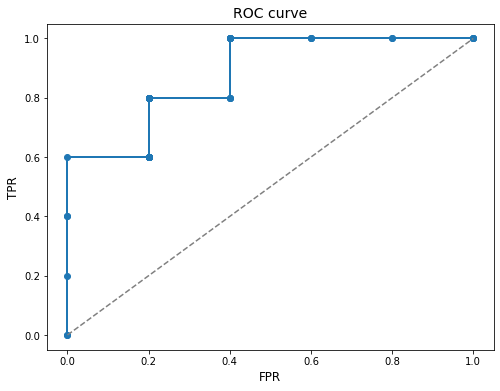

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, linewidth=2, markersize=6, marker='o')
plt.plot((0,1), (0,1), 'r--', color='gray')

plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.title('ROC curve', fontsize=14);

In [9]:
example_df[['target', 'predicted_probability']]

,target,predicted_probability
0,1,0.95
1,1,0.93
2,1,0.89
3,0,0.87
4,1,0.64
5,0,0.34
6,1,0.28
7,0,0.16
8,0,0.10
9,0,0.07


In [10]:
from sklearn.metrics import roc_auc_score

roc_auc_score(example_df['target'], (example_df['predicted_probability'].values))

0.88

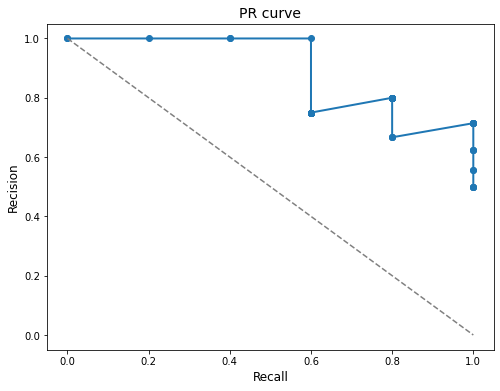

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

precision_list = pd.Series(precision_list).fillna(1).tolist()

plt.figure(figsize=(8, 6))
plt.plot(recall_list, precision_list, linewidth=2, markersize=6, marker='o')
plt.plot((0,1), (1,0), 'r--', color='gray')

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Recision', fontsize=12)
plt.title('PR curve', fontsize=14);

## <center>Практическая часть<a class="anchor" id="practice"></a><center>

### Постановка задачи<a class="anchor" id="task"></a>

На основании демографических данных о клиентах банка, истории их платежей и состоянии счета требуется предсказать невыполнение их обязательств по кредитной карте в следующем месяце.

**Описание датасета**

* **LIMIT_BAL** - Сумма предоставленного кредита
* **SEX** - Пол (1=мужчина, 2=женщина)
* **EDUCATION** - Образование (1=аспирантура, 2=университет, 3=старшая школа, 4=прочее, 5=неизвестно, 6=неизвестно)
* **MARRIAGE** - Семейное положение (1=женат/замужен, 2=не женат/не замуженм, 3=прочее)
* **AGE** - Возраст (в годах)
* **PAY_1** - Статус погашения в Сентябре (-1=погашен полностью, 0=погашен частично, 1=отсрочка платежа на один месяц, .., 3=отсрочка платежа на три месяца и более)
* **PAY_2** - Статус погашения в Августе
* **PAY_3** - Статус погашения в Июле
* **PAY_4** - Статус погашения в Июне
* **PAY_5** - Статус погашения в Мае
* **PAY_6** - Статус погашения в Апреле
* **BILL_AMT1** - Сумма выписки по счету в Сентябре
* **BILL_AMT2** - Сумма выписки по счету в Августе
* **BILL_AMT3** - Сумма выписки по счету в Июле
* **BILL_AMT4** - Сумма выписки по счету в Июне
* **BILL_AMT5** - Сумма выписки по счету в Мае
* **BILL_AMT6** - Сумма выписки по счету в Апреле
* **PAY_AMT1** - Сумма предыдущего платежа в Сентябре
* **PAY_AMT2** - Сумма предыдущего платежа в Августе
* **PAY_AMT3** - Сумма предыдущего платежа в Июле
* **PAY_AMT4** - Сумма предыдущего платежа в Июне
* **PAY_AMT5** - Сумма предыдущего платежа в Мае
* **PAY_AMT6** - Сумма предыдущего платежа в Апреле
* **NEXT_MONTH_DEFAULT** - Просрочка платежа в следующем месяце (1=да, 0=нет)

- - - 

**Подключение библиотек и скриптов**

In [12]:
import numpy as np
import pandas as pd

**Пути к директориям и файлам**

In [13]:
# input
DATASET_PATH = '../data/training_project_data.csv'

# output
PREP_DATASET_PATH = '../data/training_project_data_prep.csv'

### Загрузка данных<a class="anchor" id="load_data"></a>

In [14]:
df = pd.read_csv(DATASET_PATH)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
0,150000.0,2,2,2,24,1,2,0,0,0,...,17853.0,34527.0,28277.0,0.0,2145.0,10000.0,22000.0,3000.0,5093.0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,30748.0,30162.0,30016.0,0.0,0.0,0.0,0.0,3100.0,798.0,1
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,6784.0,6923.0,14116.0,0.0,0.0,6784.0,159.0,167.0,760.0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,55182.0,48983.0,50136.0,3500.0,2000.0,20000.0,2000.0,2000.0,2000.0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,47026.0,45971.0,47573.0,0.0,6500.0,1800.0,0.0,2500.0,2000.0,0


In [15]:
df.shape

(10000, 24)

### Приведение типов<a class="anchor" id="cast"></a>

In [16]:
df.dtypes

LIMIT_BAL             float64
SEX                     int64
EDUCATION               int64
MARRIAGE                int64
AGE                     int64
PAY_1                   int64
PAY_2                   int64
PAY_3                   int64
PAY_4                   int64
PAY_5                   int64
PAY_6                   int64
BILL_AMT1             float64
BILL_AMT2             float64
BILL_AMT3             float64
BILL_AMT4             float64
BILL_AMT5             float64
BILL_AMT6             float64
PAY_AMT1              float64
PAY_AMT2              float64
PAY_AMT3              float64
PAY_AMT4              float64
PAY_AMT5              float64
PAY_AMT6              float64
NEXT_MONTH_DEFAULT      int64
dtype: object

In [17]:
for colname in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    df[colname] = df[colname].astype('str')

In [18]:
df.dtypes

LIMIT_BAL             float64
SEX                    object
EDUCATION              object
MARRIAGE               object
AGE                     int64
PAY_1                  object
PAY_2                  object
PAY_3                  object
PAY_4                  object
PAY_5                  object
PAY_6                  object
BILL_AMT1             float64
BILL_AMT2             float64
BILL_AMT3             float64
BILL_AMT4             float64
BILL_AMT5             float64
BILL_AMT6             float64
PAY_AMT1              float64
PAY_AMT2              float64
PAY_AMT3              float64
PAY_AMT4              float64
PAY_AMT5              float64
PAY_AMT6              float64
NEXT_MONTH_DEFAULT      int64
dtype: object

### Обзор данных<a class="anchor" id="review"></a>

**Обзор целевой переменной**

In [19]:
df['NEXT_MONTH_DEFAULT'].value_counts(normalize=True)

0    0.7805
1    0.2195
Name: NEXT_MONTH_DEFAULT, dtype: float64

**Обзор количественных признаков**

In [20]:
df.describe(include='all')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
count,10000.000000,10000,10000,10000,10000.00000,10000,10000,10000,10000,10000,...,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,2,7,4,NaN,5,5,5,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2,2,2,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6068,4678,5332,NaN,4895,5178,5200,5459,5601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,168182.000000,NaN,NaN,NaN,35.39600,NaN,NaN,NaN,NaN,NaN,...,43605.665800,40347.829700,38996.784300,5511.82970,5.931217e+03,5385.050600,4585.585700,4712.134300,5055.019400,0.219500
std,130118.668771,NaN,NaN,NaN,9.19536,NaN,NaN,NaN,NaN,NaN,...,65062.788893,61044.676044,59682.999879,14748.85889,2.204220e+04,18527.041096,14066.147593,14080.847065,17359.210922,0.413929
min,10000.000000,NaN,NaN,NaN,21.00000,NaN,NaN,NaN,NaN,NaN,...,-65167.000000,-23003.000000,-339603.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,NaN,NaN,NaN,28.00000,NaN,NaN,NaN,NaN,NaN,...,2400.000000,1703.250000,1300.750000,1000.00000,7.492500e+02,390.000000,277.250000,300.000000,150.750000,0.000000
50%,140000.000000,NaN,NaN,NaN,34.00000,NaN,NaN,NaN,NaN,NaN,...,19194.000000,18261.000000,17338.000000,2163.50000,2.001000e+03,1800.000000,1500.000000,1543.000000,1500.000000,0.000000
75%,240000.000000,NaN,NaN,NaN,41.00000,NaN,NaN,NaN,NaN,NaN,...,55731.250000,50491.000000,49696.000000,5001.00000,5.000000e+03,4651.500000,4014.250000,4100.000000,4000.000000,0.000000


**Обзор номинативных/категориальных признаков**

In [21]:
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

SEX

2    6068
1    3932
Name: SEX, dtype: int64
****************************************************************************************************

EDUCATION

2    4678
1    3496
3    1674
5      90
4      42
6      18
0       2
Name: EDUCATION, dtype: int64
****************************************************************************************************

MARRIAGE

2    5332
1    4547
3     108
0      13
Name: MARRIAGE, dtype: int64
****************************************************************************************************

PAY_1

0     4895
-1    2852
1     1217
2      881
3      155
Name: PAY_1, dtype: int64
****************************************************************************************************

PAY_2

0     5178
-1    3318
2     1318
3      175
1       11
Name: PAY_2, dtype: int64
****************************************************************************************************

PAY_3

0     5200
-1    3379
2     1288
3      131
1        2
Name: PAY_3, 

### Обработка пропусков<a class="anchor" id="gaps"></a>

In [22]:
df.isna().sum()

LIMIT_BAL             0
SEX                   0
EDUCATION             0
MARRIAGE              0
AGE                   0
PAY_1                 0
PAY_2                 0
PAY_3                 0
PAY_4                 0
PAY_5                 0
PAY_6                 0
BILL_AMT1             0
BILL_AMT2             0
BILL_AMT3             0
BILL_AMT4             0
BILL_AMT5             0
BILL_AMT6             0
PAY_AMT1              0
PAY_AMT2              0
PAY_AMT3              0
PAY_AMT4              0
PAY_AMT5              0
PAY_AMT6              0
NEXT_MONTH_DEFAULT    0
dtype: int64

### Обработка выбросов<a class="anchor" id="outliers"></a>

**EDUCATION**

In [23]:
df['EDUCATION'].mode()[0]

'2'

In [24]:
df.loc[df['EDUCATION'] == '0', 'EDUCATION'] = df['EDUCATION'].mode()[0]

**MARRIAGE**

In [25]:
df['MARRIAGE'].mode()[0]

'2'

In [26]:
df.loc[df['MARRIAGE'] == '0', 'MARRIAGE'] = df['MARRIAGE'].mode()[0]

### Построение новых признаков<a class="anchor" id="new_features"></a>

**Id**

In [27]:
df['ID'] = df.index.tolist()

**Dummies**

In [28]:
df['IS_MALE'] = df['SEX'].map({'1':'1', '2':'0'}).astype(int)

In [29]:
for cat_colname in df.select_dtypes(include='object').columns[1:]:
    df = pd.concat([df, pd.get_dummies(df[cat_colname], prefix=cat_colname)], axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_4_2,PAY_4_3,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3
0,150000.0,2,2,2,24,1,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,0,1,0,0,1,0,0,1,0,0
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,0,0,0,1,0,0,0,1,0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,1,0,0,0,1,0,0,1,0,0


### Сохранение обучающего датасета<a class="anchor" id="saving"></a>

In [30]:
df.to_csv(PREP_DATASET_PATH, index=False, encoding='utf-8')

## <center>Курсовой проект<a class="anchor" id="course_project"></a><center>

### Постановка задачи<a class="anchor" id="course_project_task"></a>

**Задача**

На основании имеющихся данных о клиентах банка требуется построить модель для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*
* F1($\beta$ = 1) > 0.5 при Precision > 0.5 и Recall > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}\_solution.ipynb, пример SShirkin\_solution.ipynb
2. Файл CSV с прогнозами целевой переменной (0 или 1, а НЕ вероятность) для тестового датасета, названный по образцу {ФИО}\_predictions.csv, пример SShirkin\_predictions.csv

*Рекомендации для файла с кодом (ipynb)*
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

**Сроки сдачи**

Cдать проект нужно в течение 6 дней после окончания последнего вебинара (до 20:00 ВТ).
Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества.
Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

### Примерное описание этапов выполнения курсового проекта<a class="anchor" id="course_project_steps"></a>

**Построение модели классификации**
1. Обзор обучающего датасета
2. Обработка выбросов
3. Обработка пропусков
4. Анализ данных
5. Отбор признаков
6. Балансировка классов
7. Подбор моделей, получение бейзлана
8. Выбор наилучшей модели, настройка гиперпараметров
9. Проверка качества, борьба с переобучением
10. Интерпретация результатов

**Прогнозирование на тестовом датасете**
1. Выполнить для тестового датасета те же этапы обработки и построения признаков
2. Спрогнозировать целевую переменную, используя модель, построенную на обучающем датасете
3. Прогнозы должны быть для всех примеров из тестового датасета (для всех строк)
4. Соблюдать исходный порядок примеров из тестового датасета

### Обзор данных<a class="anchor" id="course_project_review"></a>

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - кредитный рейтинг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

**Пути к директориям и файлам**

In [31]:
TRAIN_DATASET_PATH = '../project/course_project_train.csv'
TEST_DATASET_PATH = '../project/course_project_test.csv'

**Загрузка данных**

In [32]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [33]:
df_train.shape

(7500, 17)

In [34]:
df_train['Credit Default'].value_counts(normalize=True)

0    0.718267
1    0.281733
Name: Credit Default, dtype: float64

In [35]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [36]:
df_test.shape

(2500, 16)

### Домашнее задание

1. Приведите по два примера, когда лучше максимизировать Precision, а когда Recall.

2. Почему мы используем F-меру? Почему, например, нельзя просто взять среднее от Precision и Recall?